## imctools-example

**Using Sina's  2020-Feb-05_BC24 (id 2)**<br>

A.L. 20201006

`imctools` is a python package to handle IMC raw files (.mcd & .txt) and convert them to a vendor independent OME.TIFF format. Further it handles converting OME.TIFF to a variety of other TIFF formats. Can be used in a IMC segmentation pipeline to prepare the data for CellProfiller.

(cf. https://github.com/BodenmillerGroup/imctools)

The OME.TIFF will have a standardized, yet user controlled (say: modifiable, user generatable vs. vendor controlled, instrument specific) way to store raw data of multiplexed images alongside with acquisition specific metadata in order to make it independent of IMC as a technology. As a user of cyTOF-IMC only data this might be not so important (as long as Fluidigm never changes the .mcd file format), but in the view that maybe one day there will be other multiplexed image technology vendors it might be worth to build the data analysis in a way that starts with a user controlled format. Also if everybody (speak also Ilastik, CellProfiller, HistoCAT's, ImageJ) would respect his open standard, everything would get much more compatible and easier to interface between programs (e.g. dealing with IMC image data as an image5d stack).
Unfortunately - despite much talk - the OME.TIFF's are as widely supported (yet) as one would hope. There are some programs that support them e.g. OME.TIFF's generated from IMC can be loaded and viewed in OMERO (https://www.openmicroscopy.org/omero) and are also correctly recognized in FIJI (however the support once loading is till quite cumbersome).

- Vito http://www.imc-forum.org/viewtopic.php?f=4&t=7

### histoCAT Software for Computational Imaging Mass Cytometry Analysis
histoCAT software is an innovative computational IMC analysis toolbox that enables comprehensive analysis of cellular phenotypes and their interrelationships within the spatial context of the tissue microenvironment. Developed in the laboratory of Bernd Bodenmiller at the University of Zurich, histoCAT includes novel algorithms to identify the relationships and “social networks” between cells in healthy and disease states and across experimental cohorts. Under an agreement with the University of Zurich, Fluidigm obtained rights to globally distribute histoCAT along with the Hyperion Imaging System.

### histoCAT++

See also histoCAT++ -  now commercially distributed by Fluidigm for customers using Hyperion Imaging System for Imaging Mass Cytometry and the histoCAT++ software binaries can also be
downloaded [histoCAT++](http://www.bodenmillerlab.org/histoCAT_downloads/histoCAT++.zip) (macOS only) (New version 3.0 – 5 May 2020. With bug fixes, improved memory use, compensation functions enabled, fcs export, better label system for tiles, and adapted for High Sierra. Much smaller download. See also the manual at http://www.bodenmillerlab.org/histoCAT_manual/index.php/manual_plus

In [1]:
# To display plots directly in the notebook:
%matplotlib inline
import numpy as np
import pandas as pd
from imctools.io.mcd.mcdparser import McdParser
import matplotlib.pyplot as plt
import tifffile as tiff
import os
home = os.path.expanduser('~')  # To make path to local home directory

In [2]:
fn_mcd = "./data/Sina/2020-Feb-05_BC24.mcd"

In [3]:
parser = McdParser(fn_mcd)

In [4]:
# Get original metadata in XML format
xml = parser.get_mcd_xml()

In [5]:
# Get parsed session metadata (i.e. session -> slides -> acquisitions -> channels, panoramas data)
session = parser.session

In [6]:
# Get all acquisition IDs
ids = parser.session.acquisition_ids
ids

(1, 2)

In [7]:
# The common class to represent a single IMC acquisition is AcquisitionData class.
# Get acquisition data for acquisition with id 2
ac_data = parser.get_acquisition_data(2)
print(ac_data)
print(ac_data.image_data.shape)

AcquisitionData(acquisition=Acquisition(id=2, description=BC24_ROI 02))
(33, 375, 441)


In [8]:
dinames = dict(zip(ac_data.channel_names, range(len(ac_data.channel_names))))
dinames

{'Ba138': 0,
 'Pb208': 1,
 'Nd146': 2,
 'Nd150': 3,
 'Nd144': 4,
 'Sm154': 5,
 'Sm152': 6,
 'Sm149': 7,
 'Gd158': 8,
 'Gd156': 9,
 'Dy162': 10,
 'Er170': 11,
 'Yb176': 12,
 'Yb174': 13,
 'I127': 14,
 'Ir191': 15,
 'Eu153': 16,
 'Lu175': 17,
 'Ho165': 18,
 'Ir193': 19,
 'Nd142': 20,
 'Nd145': 21,
 'Gd155': 22,
 'Er166': 23,
 'Yb173': 24,
 'Tm169': 25,
 'Eu151': 26,
 'Nd148': 27,
 'Dy164': 28,
 'Er168': 29,
 'Yb171': 30,
 'Sm147': 31,
 'Nd143': 32}

In [9]:
dilabs = dict(zip(ac_data.channel_labels, range(len(ac_data.channel_labels))))
dilabs

{'138Ba': 0,
 '208Pb': 1,
 'CD16': 2,
 'PD-L1': 3,
 'CD14': 4,
 'CD11c': 5,
 'CD45': 6,
 'CD11b': 7,
 'E-Cadherin': 8,
 'CD4': 9,
 'CD8': 10,
 'CD3': 11,
 'His-H3': 12,
 'HLA-DR': 13,
 '127I': 14,
 '191Ir': 15,
 'CD44': 16,
 'Pan-Actin': 17,
 'p-CREB': 18,
 '193Ir': 19,
 'CD19': 20,
 'CD33': 21,
 'FoxP3': 22,
 'CD45RA': 23,
 'CD45RO': 24,
 'Collagen I': 25,
 'CD31': 26,
 'Pan-Keratin': 27,
 'Cytokeratin 7': 28,
 'Ki-67': 29,
 'p-ERK': 30,
 'SOX9': 31,
 'Vimentin': 32}

In [10]:
dilabs['His-H3']

12

In [11]:
df1 = pd.DataFrame(list(dinames.items()), columns=['Names', 'Chn_no'])
df2 = pd.DataFrame(list(dilabs.items()), columns=['Labels', 'Chn_no'])
df = pd.merge(df1, df2, on="Chn_no")
df = df.reindex(columns=['Names', 'Labels', 'Chn_no'])
df

,Names,Labels,Chn_no
0,Ba138,138Ba,0
1,Pb208,208Pb,1
2,Nd146,CD16,2
3,Nd150,PD-L1,3
4,Nd144,CD14,4
5,Sm154,CD11c,5
6,Sm152,CD45,6
7,Sm149,CD11b,7
8,Gd158,E-Cadherin,8
9,Gd156,CD4,9


In [12]:
# imc acquisitions can yield the image data by name (tag), label or index
chn1 = ac_data.get_image_by_name('Yb176')
chn2 = ac_data.get_image_by_label('191Ir')
chn3 = ac_data.get_image_by_index(19)
chn4 = ac_data.get_image_by_label('SOX9')
print(chn1.shape)
print(chn1.min(), chn1.max())

(375, 441)
0.0 31.196407


In [13]:
def hist_eq(chn):
    return np.sort(chn.ravel()).searchsorted(chn)

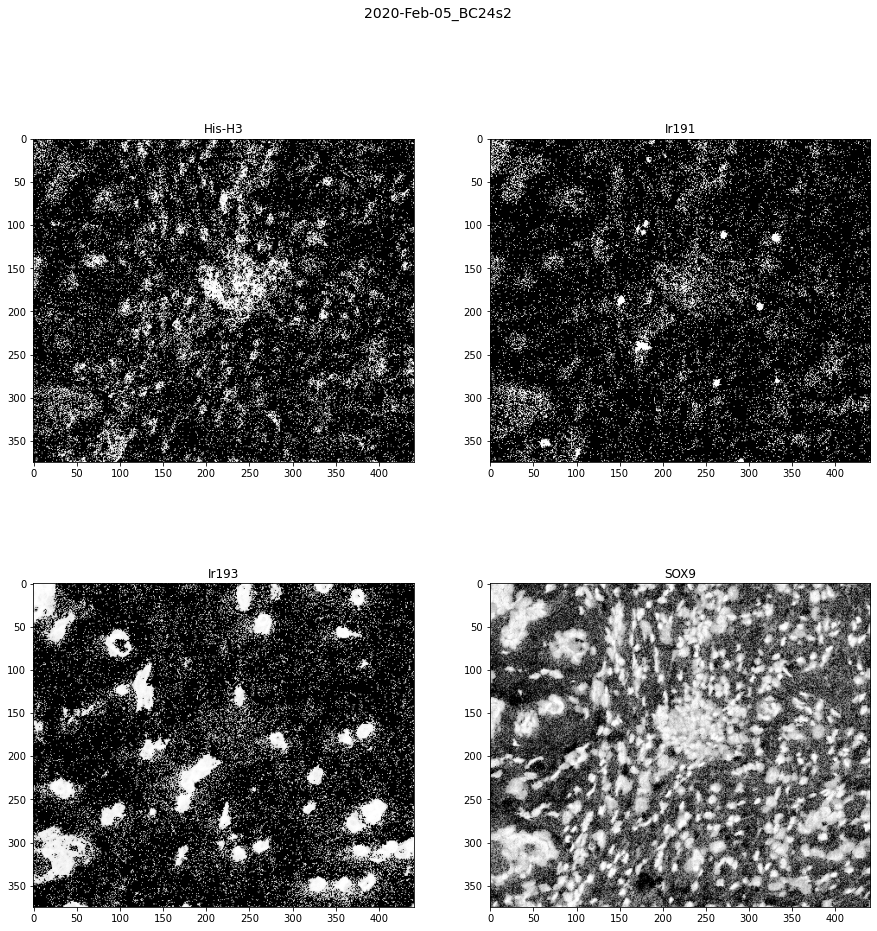

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15), sharex=False, sharey=False)
ax = axes.ravel()
ax[0].imshow(hist_eq(chn1), cmap='gray')
ax[0].set_title("His-H3")
ax[1].imshow(hist_eq(chn2), cmap='gray')
ax[1].set_title("Ir191")
ax[2].imshow(hist_eq(chn3), cmap='gray')
ax[2].set_title("Ir193")
ax[3].imshow(hist_eq(chn4), cmap='gray')
ax[3].set_title("SOX9")
plt.suptitle('2020-Feb-05_BC24s2', fontsize=14)
plt.show()

In [15]:
# or can be used to save OME-TIFF files
fn_out ='./data/Sina/2020-Feb-05_BC24_His-H3_Ir191_Ir193_SOX9.ome.tiff'
ac_data.save_ome_tiff(fn_out, names=['Yb176', 'Ir191', 'Ir193', 'Sm147'])

In [16]:
# save multiple standard TIFF files in a folder
#ac_data.save_tiffs("./data/Sina/2020-Feb-05_BC24", compression=0, bigtiff=False)

In [17]:
#tiff.imsave('%s/Desktop/2020-Feb-05_BC24s2.tiff' % (home), np.float32(ac_data.image_data))
tiff.imsave('./data/Sina/2020-Feb-05_BC24s2.tiff', np.float32(ac_data.image_data))
df.to_csv('./data/Sina/2020-Feb-05_BC24s2.csv', index=False)

In [18]:
# as the mcd object is using lazy loading memory maps, it needs to be closed
# or used with a context manager.
parser.close()